In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter, EngFormatter, FormatStrFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

_____
## Sensitivity Analysis - LCOC

In [4]:
# DATA
variables = [
    'Charging Mix',
    'Lifetime VMT',
    'Utility Tariffs:\nResidential',
    'Capital Costs:\nResidential',
    'Capital Costs:\nWork/Public-L2',
    'Capital Costs:\nDCFC',
    'Compounded'
]

base = 0.15

low_effects = [
    base - 0.145958568, #charge mix
    base - 0.141343116, #lifetime vmt
    base - 0.127500082, #res TOU
    base - 0.113184796, #cc: res
    base - 0.144291432, #cc: work
    base - 0.147601962, #cc:dcfc
    base - 0.077652478 #comb
]

low_vals = [base-eff for eff in low_effects]

high_effects = [
    0.185886419 - base, #charge mix
    0.169501437 - base, #lifetime vmt
    0.172553194 - base, #res TOU
    0.154639093 - base, #cc: res
    0.161845687 - base, #cc: work
    0.152238441 - base, #cc:dcfc
    0.270527132 - base #comb
]

high_vals = [base+eff for eff in high_effects]

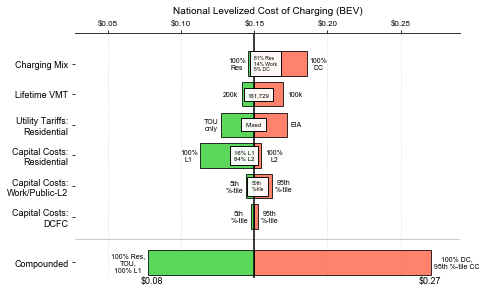

In [39]:
plt.figure(figsize=(6.88976,4.5))
ys = [y for y in range(len(variables))[::-1]]  # top to bottom
ys.pop()
ys.append(-0.5)

low_bnd_txts = ['100%\nRes', 
                '200k',
                'TOU\nonly', 
                '100%\nL1', 
                '5th\n%-tile', 
                '5th\n%-tile', 
                '100% Res,\nTOU,\n100% L1']
med_txts = ['81% Res\n14% Work\n5% DC', 
            '161,729',
            'Mixed', 
            '16% L1\n84% L2', 
            '50th\n%-tile', 
            '50th\n%-tile', '']
high_bnd_txts = ['100%\nDC', 
                 '100k',
                 'EIA', 
                 '100%\nL2', 
                 '95th\n%-tile', 
                 '95th\n%-tile', 
                 '100% DC,\n95th %-tile CC']

# Plot bars, one at a time
for y, low_eff, low_val, high_eff, high_val, low_txt, med_txt, high_txt in zip(ys, 
                                                                                           low_effects, 
                                                                                           low_vals, 
                                                                                           high_effects, 
                                                                                           high_vals,
                                                                                           low_bnd_txts,
                                                                                           med_txts,
                                                                                           high_bnd_txts):

    # low bound
    plt.barh(
        y,
        width=low_eff,
        height=0.8,
        left=low_val,
        color='limegreen',
        edgecolor='black',
        linewidth=1,
        zorder=2,
        alpha=0.8
    )
  
    # high bound
    plt.barh(
        y,
        width=high_eff,
        height=0.8,
        left=base,
        color='tomato',
        edgecolor='black',
        linewidth=1,
        zorder=2,
        alpha=0.8
    )
    
    if y == 6: #charging mix
        plt.text(low_val-0.008, y-0.19, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(base, y-0.23, med_txt, fontsize=5, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+0.008, y-0.18, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 5: #lifetime vmt
        plt.text(low_val-0.008, y-0.08, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(base-.0045, y-0.07, med_txt, fontsize=6, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+0.008, y-0.08, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 4: #res TOU
        plt.text(low_val-0.007, y-0.18, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(base-0.006, y-0.05, med_txt, fontsize=6, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+0.002, y-0.05, high_txt, fontsize=7, fontname='Arial')
    elif y == 3: #cc-res
        plt.text(low_val-0.008, y-0.2, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(base-.007, y-0.15, med_txt, fontsize=6, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), ha='center', fontname='Arial') 
        plt.text(high_val+0.009, y-0.2, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 2: #cc - work
        plt.text(low_val-0.008, y-0.2, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(base-0.002, y-0.15, med_txt, fontsize=5, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+0.008, y-0.18, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 1: #cc - dcfc
        plt.text(low_val-0.008, y-0.2, low_txt, fontsize=7, ha='center', fontname='Arial')   
        #plt.text(base+.0185, y+0.28, med_txt, fontsize=8, bbox=dict(facecolor='w', edgecolor='k', alpha=0.9)) 
        plt.text(high_val+0.008, y-0.2, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == -0.5: #COMBINED
        plt.text(low_val-0.014, y-0.32, low_txt, fontsize=7, ha='center', fontname='Arial')
        plt.text(high_val+0.018, y-0.2, high_txt, fontsize=7, ha='center', fontname='Arial')
        plt.text(low_val-0.005, y-0.7, "${}".format(round(low_val,2)), fontsize=9, fontname='Arial')    
        plt.text(high_val-0.008, y-0.7, "${}".format(round(high_val,2)), fontsize=9, fontname='Arial')
    
# Draw a vertical line down the middle
plt.axvline(base, color='black')
plt.axhline(0.25, color='black', linestyle = '-', linewidth=0.5, alpha=0.4)

# Plot state outlier points
# plt.scatter(0.25, 4, 50, marker='x', c='salmon')
# plt.text(0.248, 3.6, "AK")
# plt.scatter(0.3, 4, 50, marker='x', c='salmon')
# plt.text(0.298, 3.6, "HI")
# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables, fontsize=9, fontname='Arial')
xticks = [0.05, 0.1, 0.15, 0.2, 0.25, 0.30]
plt.xticks(xticks, ['${:.2f}'.format(x) for x in xticks], fontsize=8, fontname='Arial')
plt.title('National Levelized Cost of Charging (BEV)', fontsize=10, fontname='Arial')
plt.xlim(min(low_vals)-0.05, max(high_vals)+0.02)
plt.ylim(-1, len(variables))
plt.grid(axis='x', linestyle='--', alpha=0.3, zorder=1)
plt.savefig('lcoc_sensitivity_chart.png', dpi=300, bbox_inches='tight') #save
plt.show()

___  
## Sensitivity Analysis - LFCS

In [41]:
# DATA
variables = [
    'Charge Behaviors\n& Equip. Costs',
    'Lifetime VMT',
    'Gasoline Price\n Forecast',
    'Electricity Price\n Forecast',
    'Discount Rate',
    'Compounded'
]

lfcs_base_bev = 7757.68
lfcs_base_phev = 7316.74

neg_effects_bevs = [
    lfcs_base_bev - 3078.26, #lcoc - charge behaviors & equip. (most expensive)
    lfcs_base_bev - 4796.72, #lifetime vmt (100k)
    lfcs_base_bev - 5725.58, #AEO gas scenario (low oil)
    lfcs_base_bev - 7737.13, #AEO electricity scenario (low oil)
    lfcs_base_bev - 6437.30, #discount rate (7%)
    lfcs_base_bev - 554.90  #comb - high LCOC, low vmt, low oil fuel price forecast, high discount rate
]

neg_effects_phevs = [
    lfcs_base_phev - 4219.64, #lcoc - charge behaviors & equip. (most expensive)
    lfcs_base_phev - 4524.07, #lifetime vmt (100k)
    lfcs_base_phev - 5598.93, #AEO gas scenario (low oil)
    lfcs_base_phev -  7302.13, #AEO electricity scenario (low oil)
    lfcs_base_phev - 6075.39, #discount rate (7%)
    lfcs_base_phev - 1306.51  #comb - high LCOC, low vmt, low oil fuel price forecast, high discount rate
]

low_vals_bevs = [lfcs_base_bev - eff for eff in neg_effects_bevs]
low_vals_phevs = [lfcs_base_phev - eff for eff in neg_effects_phevs]

pos_effects_bevs = [
    10103.36 - lfcs_base_bev, #lcoc - charge behaviors & equip. (least_expensive)
    9593.43 - lfcs_base_bev, #lifetime vmt (200k)
    9923.45 - lfcs_base_bev, #AEO gas scenario (high oil)
    7880.55 - lfcs_base_bev, #AEO electricity scenario (high oil)
    7983.69 - lfcs_base_bev, #discount rate (3%)
    16141.26 - lfcs_base_bev  #comb - low LCOC, high vmt, high oil fuel price forecast, low discount rate
]

pos_effects_phevs = [
    9082.33 - lfcs_base_phev, #lcoc - charge behaviors & equip. (least_expensive)
    9048.14 - lfcs_base_phev, #lifetime vmt (200k)
    9147.54 - lfcs_base_phev, #AEO gas scenario (high oil)
    7404.11 - lfcs_base_phev, #AEO electricity scenario (high oil)
    7529.16 - lfcs_base_phev, #discount rate (3%)
    13959.39 - lfcs_base_phev #comb - low LCOC, high vmt, high oil fuel price forecast, low discount rate
]

high_vals_bevs = [lfcs_base_bev + eff for eff in pos_effects_bevs]
high_vals_phevs = [lfcs_base_phev + eff for eff in pos_effects_phevs]

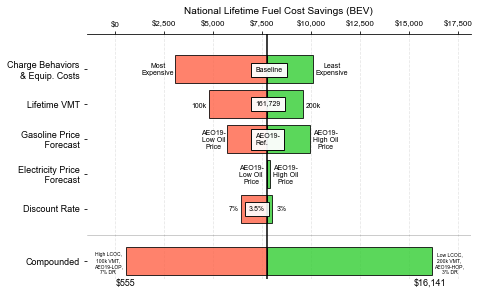

In [52]:
plt.figure(figsize=(6.88976, 4.5))
ys = [y for y in range(len(variables))[::-1]]  # top to bottom
ys.pop()
ys.append(-0.5)

high_bnd_txts = ['Least\nExpensive', 
                '200k',
                'AEO19-\nHigh Oil\nPrice', 
                'AEO19-\nHigh Oil\nPrice', 
                '3%',  
                'Low LCOC,\n200k VMT,\nAEO19-HOP,\n3% DR']

med_txts = ['Baseline', 
            '161,729',
            'AEO19-\nRef.', 
            'AEO19-\nRef.', 
            '3.5%',
            '']

low_bnd_txts = ['Most\nExpensive', 
                '100k',
                'AEO19-\nLow Oil\nPrice', 
                'AEO19-\nLow Oil\nPrice', 
                '7%',  
                'High LCOC,\n100k VMT,\nAEO19-LOP,\n7% DR']

# Plot bars, one at a time
for y, low_eff, low_val, high_eff, high_val, low_txt, med_txt, high_txt in zip(ys, 
                                                                               neg_effects_bevs,
                                                                               low_vals_bevs,
                                                                               pos_effects_bevs,
                                                                               high_vals_bevs,
                                                                               low_bnd_txts,
                                                                               med_txts,
                                                                               high_bnd_txts):

    # low bound - bev
    plt.barh(
        y,
        width=low_eff,
        height=0.8,
        left=low_val,
        color='tomato',
        edgecolor='black',
        linewidth=1,
        zorder=2,
        alpha=0.8
    )
    
    # high bound - bev
    plt.barh(
        y,
        width=high_eff,
        height=0.8,
        left=lfcs_base_bev,
        color='limegreen',
        edgecolor='black',
        linewidth=1,
        zorder=2,
        alpha=0.8
    )
    
    if y == 5: #lcoc
        plt.text(low_val-900, y-0.17, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(lfcs_base_bev-600, y-0.07, med_txt, fontsize=7, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+950, y-0.17, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 4: #vmt
        plt.text(low_val-500, y-0.1, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(lfcs_base_bev-600, y-0.05, med_txt, fontsize=7, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+150, y-0.1, high_txt, fontsize=7, fontname='Arial')
    elif y == 3: #gas forecast
        plt.text(low_val-700, y-0.28, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(lfcs_base_bev-600, y-0.17, med_txt, fontsize=7, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), fontname='Arial') 
        plt.text(high_val+800, y-0.28, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 2: #elec forecast
        plt.text(low_val-800, y-0.28, low_txt, fontsize=7, ha='center', fontname='Arial')   
#         plt.text(lfcs_base_bev-600, y-0.17, med_txt, fontsize=10, bbox=dict(facecolor='w', edgecolor='k', alpha=0.95), ha='center') 
        plt.text(high_val+800, y-0.28, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == 1: #dr
        plt.text(low_val-400, y-0.07, low_txt, fontsize=7, ha='center', fontname='Arial')   
        plt.text(lfcs_base_bev-515, y-0.07, med_txt, fontsize=7, bbox=dict(facecolor='w', edgecolor='k', alpha=0.9), fontname='Arial', ha='center') 
        plt.text(high_val+500, y-0.07, high_txt, fontsize=7, ha='center', fontname='Arial')
    elif y == -0.5: #COMBINED
        plt.text(low_val-900, y-0.35, low_txt, fontsize=5, ha='center', fontname='Arial')
        plt.text(high_val+900, y-0.35, high_txt, fontsize=5, ha='center', fontname='Arial')
        plt.text(low_val-500, y-0.7, "${:,}".format(int(round(low_val,0))), fontsize=9, fontname='Arial')    
        plt.text(high_val-900, y-0.7, "${:,}".format(int(round(high_val,0))), fontsize=9, fontname='Arial')
    
# Draw a vertical line down the middle
plt.axvline(lfcs_base_bev, color='black')
plt.axhline(0.25, color='black', linestyle = '-', linewidth=0.5, alpha=0.4)

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables, fontsize=9, fontname='Arial')
xticks = [-2500, 0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
plt.xticks(xticks, ['${:,}'.format(x) for x in xticks], fontsize=8, fontname='Arial')
plt.xlim(min(low_vals_bevs)-2000, max(high_vals_bevs)+2000)
plt.ylim(-1, len(variables))
plt.title('National Lifetime Fuel Cost Savings (BEV)', fontsize=10, fontname='Arial')
plt.grid(axis='x', linestyle='--', alpha=0.3, zorder=1)
plt.savefig('lfcs_sensitivity_chart.png', dpi=300, bbox_inches='tight') #save
plt.show()

_____  
## State-Level LCOC

In [53]:
## LOWER BOUND
lower_bnd_path = '../outputs/cost-of-charging/'

# DCFC
lower_bnd_df = pd.read_csv(lower_bnd_path + 'dcfc/dcfc_states_lower_bnd_equip.csv', usecols=['State','comb_lcoc'])
lower_bnd_df.rename(columns={'comb_lcoc': 'lcoc_dcfc'}, inplace=True)
lower_bnd_df.rename(columns={'State': 'state'}, inplace=True)

# Residential
res1_df = pd.read_csv(lower_bnd_path + 'residential/res_states_lower_bnd_equip_tou.csv')
res2_df = pd.read_csv(lower_bnd_path + 'residential/res_states_lower_bnd_equip.csv')

#replace nulls in TOU + equip w/ equip-only (some states did not have a TOU rate)
res1_df.index=res1_df['state']
res1_df.drop(columns='state', inplace=True)
res2_df.index=res2_df['state']
res2_df.drop(columns='state', inplace=True)
res2_df.update(res1_df)

res2_df.rename(columns={'lcoc_cost_per_kwh': 'lcoc_residential'}, inplace=True)
lower_bnd_df = pd.merge(lower_bnd_df, res2_df, on='state')

# Workplace/Public-L2
temp_df = pd.read_csv(lower_bnd_path + 'workplace-public-l2/work_pub_l2_states_lower_bnd_equip.csv')
temp_df.rename(columns={'lcoc_cost_per_kwh': 'lcoc_workplace'}, inplace=True)
lower_bnd_df = pd.merge(lower_bnd_df, temp_df, on='state')
lower_bnd_df.head()

,state,lcoc_dcfc,lcoc_residential,lcoc_workplace
0,AK,0.162232,0.217398,0.202091
1,AL,0.237070,0.050033,0.129191
2,AR,0.187821,0.054070,0.098291
3,AZ,0.169167,0.071536,0.118191
4,CA,0.205114,0.131836,0.170791
5,CO,0.164656,0.067984,0.112091
6,CT,0.220193,0.083758,0.173791
7,DC,0.105006,0.042665,0.129791
8,DE,0.205864,0.030515,0.112091
9,FL,0.209452,0.064838,0.106691


In [54]:
lower_bnd_phev_df = lower_bnd_df.copy()
lower_bnd_phev_df.drop(columns='lcoc_dcfc', inplace=True)
lower_bnd_df['lcoc_min'] = lower_bnd_df[lower_bnd_df.columns[1:]].min(axis=1)
lower_bnd_phev_df['lcoc_min'] = lower_bnd_phev_df[lower_bnd_phev_df.columns[1:]].min(axis=1)
lower_bnd_phev_df.head()

,state,lcoc_residential,lcoc_workplace,lcoc_min
0,AK,0.217398,0.202091,0.202091
1,AL,0.050033,0.129191,0.050033
2,AR,0.054070,0.098291,0.054070
3,AZ,0.071536,0.118191,0.071536
4,CA,0.131836,0.170791,0.131836


In [55]:
## UPPER BOUND
upper_bnd_path = '../outputs/cost-of-charging/'

# DCFC
upper_bnd_df = pd.read_csv(upper_bnd_path + 'dcfc/dcfc_states_upper_bnd_equip.csv', usecols=['State','comb_lcoc'])
upper_bnd_df.rename(columns={'comb_lcoc': 'lcoc_dcfc'}, inplace=True)
upper_bnd_df.rename(columns={'State': 'state'}, inplace=True)

# Residential
temp_df = pd.read_csv(upper_bnd_path + 'residential/res_states_upper_bnd_equip_tou.csv')
temp_df.rename(columns={'lcoc_cost_per_kwh': 'lcoc_residential'}, inplace=True)
upper_bnd_df = pd.merge(upper_bnd_df, temp_df, on='state')

# Workplace/Public-L2
temp_df = pd.read_csv(upper_bnd_path + 'workplace-public-l2/work_pub_l2_states_upper_bnd_equip.csv')
temp_df.rename(columns={'lcoc_cost_per_kwh': 'lcoc_workplace'}, inplace=True)
upper_bnd_df = pd.merge(upper_bnd_df, temp_df, on='state')
upper_bnd_df.head()

,state,lcoc_dcfc,lcoc_residential,lcoc_workplace
0,AK,0.264001,0.268569,0.327478
1,AL,0.329800,0.176985,0.254578
2,AR,0.289590,0.153957,0.223678
3,AZ,0.260936,0.175934,0.243578
4,CA,0.296969,0.225964,0.296178
5,CO,0.262323,0.172152,0.237478
6,CT,0.318650,0.211941,0.299178
7,DC,0.203548,0.161623,0.255178
8,DE,0.304406,0.176666,0.237478
9,FL,0.302182,0.167418,0.232078


In [56]:
upper_bnd_phev_df = upper_bnd_df.copy()
upper_bnd_phev_df.drop(columns='lcoc_dcfc', inplace=True)
upper_bnd_df['lcoc_max'] = upper_bnd_df[upper_bnd_df.columns[1:]].max(axis=1)
upper_bnd_phev_df['lcoc_max'] = upper_bnd_phev_df[upper_bnd_phev_df.columns[1:]].max(axis=1)
upper_bnd_df.head()

,state,lcoc_dcfc,lcoc_residential,lcoc_workplace,lcoc_max
0,AK,0.264001,0.268569,0.327478,0.327478
1,AL,0.329800,0.176985,0.254578,0.329800
2,AR,0.289590,0.153957,0.223678,0.289590
3,AZ,0.260936,0.175934,0.243578,0.260936
4,CA,0.296969,0.225964,0.296178,0.296969


In [57]:
# Output to file
lower_bnd_df.to_csv('../outputs/cost-of-charging/comb/comb_states_lower_bnd.csv', index=False)
upper_bnd_df.to_csv('../outputs/cost-of-charging/comb/comb_states_upper_bnd.csv', index=False)
lower_bnd_phev_df.to_csv('../outputs/cost-of-charging/comb/comb_states_phev_lower_bnd.csv', index=False)
upper_bnd_phev_df.to_csv('../outputs/cost-of-charging/comb/comb_states_phev_upper_bnd.csv', index=False)

In [58]:
# Gasoline Prices
gas_price_fp = '../data/aaa/190702_fuel_prices_aaa.csv'
gas_prices_df = pd.read_csv(gas_price_fp)

ev_mpgge = 103.97
cv_mpg = 25.25
kwh_to_gge = 0.031 #source:https://epact.energy.gov/fuel-conversion-factors

def approx_breakeven_dollars_per_kwh(dollars_per_gallon,
                                     ev_mpgge=ev_mpgge,
                                     cv_mpg=cv_mpg):
    miles_per_kwh = ev_mpgge * kwh_to_gge
    breakeven_dollars_per_kwh = miles_per_kwh / cv_mpg * dollars_per_gallon
    
    return breakeven_dollars_per_kwh

gas_prices_df['lcoc_breakeven'] = gas_prices_df['regular'].apply(approx_breakeven_dollars_per_kwh)

In [63]:
# Set PATHs
baseline_filepath = '../outputs/cost-of-charging/comb/comb_states_baseline.csv'
baseline_phev_filepath = '../outputs/cost-of-charging/comb/comb_states_phev_baseline.csv'

state_name_dict = {'US': 'United States',
                   'AK': 'Alaska',
                   'AL': 'Alabama', 
                   'AR': 'Arkansas',
                   'AZ': 'Arizona',
                   'CA': 'California',
                   'CO': 'Colorado',
                   'CT': 'Connecticut',
                   'DC': 'Washington, D.C.',
                   'DE': 'Delaware',
                   'FL': 'Florida',
                   'GA': 'Georgia',
                   'HI': 'Hawaii',
                   'IA': 'Iowa',
                   'ID': 'Idaho',
                   'IL': 'Illinois',
                   'IN': 'Indiana',
                   'KS': 'Kansas',
                   'KY': 'Kentucky',
                   'LA': 'Louisiana',
                   'MA': 'Massachusetts',
                   'MD': 'Maryland',
                   'ME': 'Maine',
                   'MI': 'Michigan',
                   'MN': 'Minnesota',
                   'MO': 'Missouri',
                   'MS': 'Mississippi',
                   'MT': 'Montana',
                   'NC': 'North Carolina',
                   'ND': 'North Dakota',
                   'NE': 'Nebraska',
                   'NH': 'New Hampshire',
                   'NJ': 'New Jersey',
                   'NM': 'New Mexico',
                   'NV': 'Nevada',
                   'NY': 'New York',
                   'OH': 'Ohio',
                   'OK': 'Oklahoma',
                   'OR': 'Oregon',
                   'PA': 'Pennsylvania',
                   'RI': 'Rhode Island',
                   'SC': 'South Carolina',
                   'SD': 'South Dakota',
                   'TN': 'Tennessee',
                   'TX': 'Texas',
                   'UT': 'Utah',
                   'VA': 'Virginia',
                   'VT': 'Vermont',
                   'WA': 'Washington',
                   'WI': 'Wisconsin',
                   'WV': 'West Virginia',
                   'WY': 'Wyoming'
                  }

baseline_data = pd.read_csv(baseline_filepath)
baseline_phev_data = pd.read_csv(baseline_phev_filepath)

baseline_data['state'] = baseline_data['state'].apply(lambda x: state_name_dict[x])
baseline_phev_data['state'] = baseline_phev_data['state'].apply(lambda x: state_name_dict[x])
# lower_bnd_df['state'] = lower_bnd_df['state'].apply(lambda x: state_name_dict[x])
# lower_bnd_phev_df['state'] = lower_bnd_phev_df['state'].apply(lambda x: state_name_dict[x])
upper_bnd_df['state'] = upper_bnd_df['state'].apply(lambda x: state_name_dict[x])
upper_bnd_phev_df['state'] = upper_bnd_phev_df['state'].apply(lambda x: state_name_dict[x])
#gas_prices_df['state'] = gas_prices_df['state'].apply(lambda x: state_name_dict[x])

baseline_data = baseline_data.sort_values(by='state')
baseline_phev_data = baseline_phev_data.sort_values(by='state')
lower_bnd_df = lower_bnd_df.sort_values(by='state')
lower_bnd_phev_df = lower_bnd_phev_df.sort_values(by='state')
upper_bnd_df = upper_bnd_df.sort_values(by='state')
upper_bnd_phev_df = upper_bnd_phev_df.sort_values(by='state')
#gas_prices_df = gas_prices_df.sort_values(by='state')

baseline_data = pd.concat([baseline_data[baseline_data.state=='United States'],
                          baseline_data[baseline_data.state!='United States']]).reset_index(drop=True)
baseline_phev_data = pd.concat([baseline_phev_data[baseline_phev_data.state=='United States'],
                                baseline_phev_data[baseline_phev_data.state!='United States']]).reset_index(drop=True)
lower_bnd_df = pd.concat([lower_bnd_df[lower_bnd_df.state=='United States'],
                          lower_bnd_df[lower_bnd_df.state!='United States']]).reset_index(drop=True)
lower_bnd_phev_df = pd.concat([lower_bnd_phev_df[lower_bnd_phev_df.state=='United States'],
                               lower_bnd_phev_df[lower_bnd_phev_df.state!='United States']]).reset_index(drop=True)
upper_bnd_df = pd.concat([upper_bnd_df[upper_bnd_df.state=='United States'],
                          upper_bnd_df[upper_bnd_df.state!='United States']]).reset_index(drop=True)
upper_bnd_phev_df = pd.concat([upper_bnd_phev_df[upper_bnd_phev_df.state=='United States'],
                          upper_bnd_phev_df[upper_bnd_phev_df.state!='United States']]).reset_index(drop=True)
# gas_prices_df = pd.concat([gas_prices_df[gas_prices_df.state=='United States'],
#                            gas_prices_df[gas_prices_df.state!='United States']])

KeyError: 'United States'

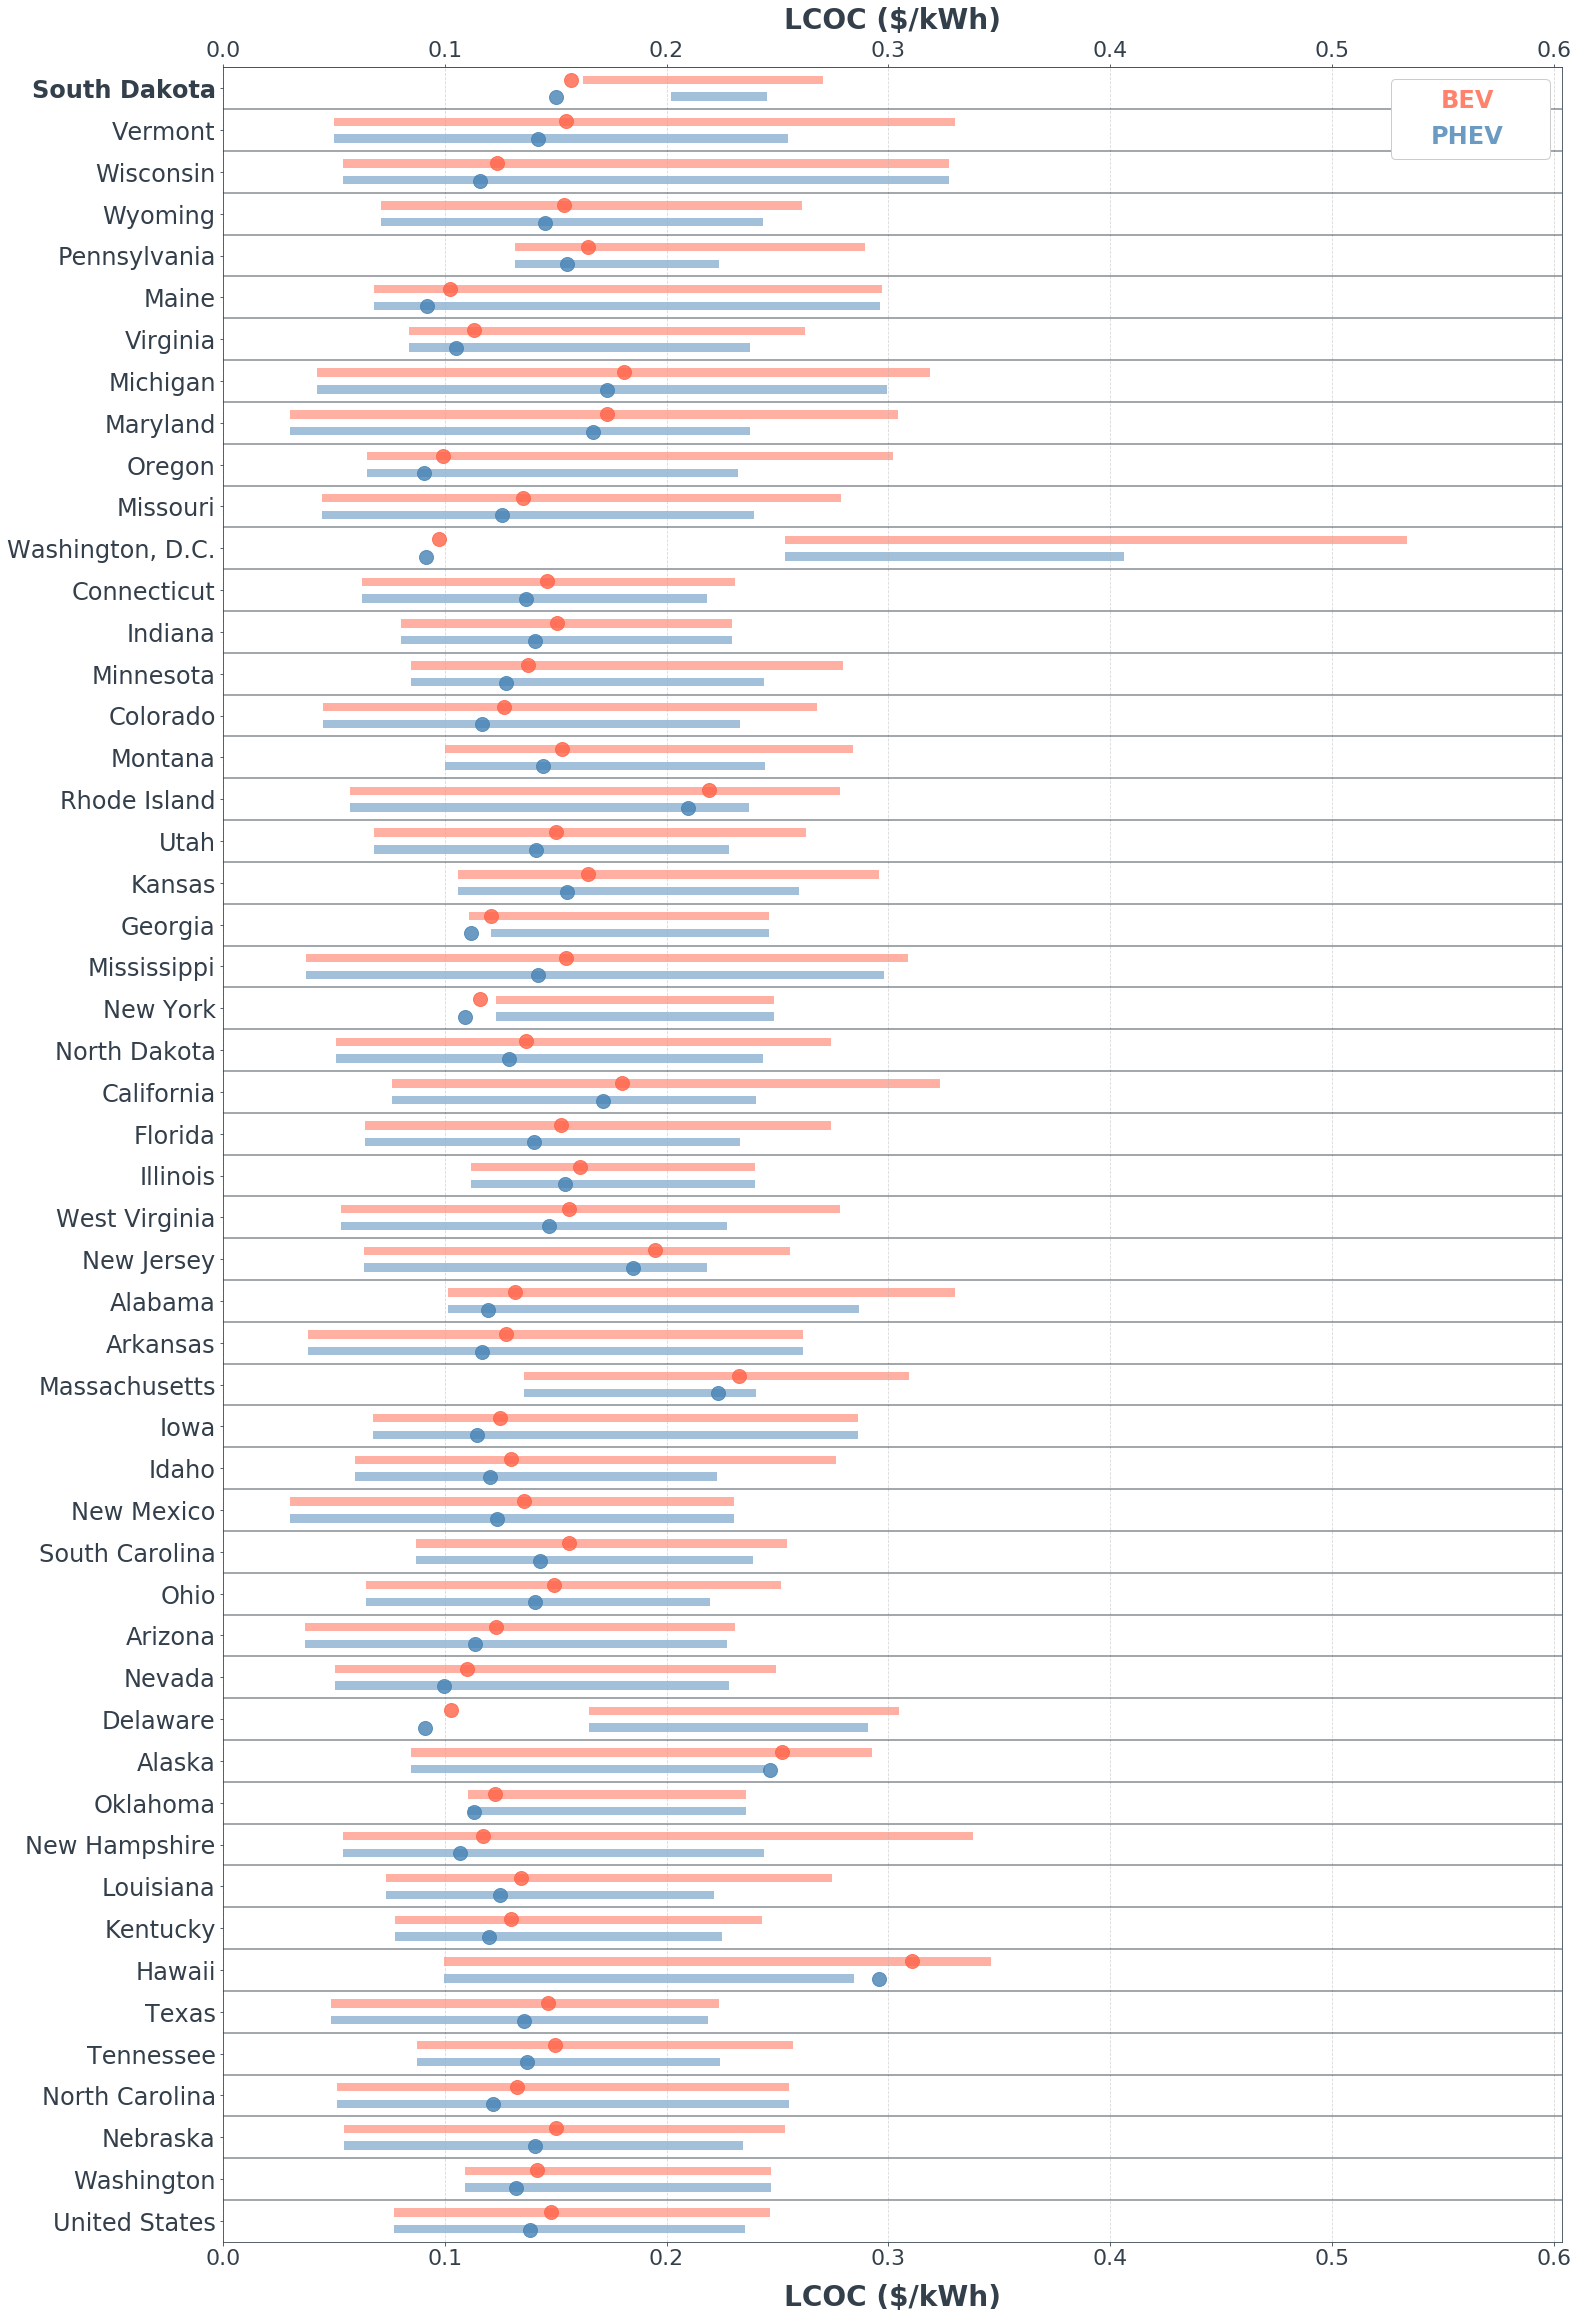

In [64]:
#index = [0] + list(range(1,35))
index = list(range(len(baseline_data)))

fig, ax1 = plt.subplots(figsize=(24,40))
y_vals = list(range(len(baseline_data.iloc[index])))[::-1]
y_labels = baseline_data['state'].iloc[index]
baseline_pts = baseline_data['lcoc_cost_per_kwh'].iloc[index]
baseline_phev_pts = baseline_phev_data['lcoc_cost_per_kwh'].iloc[index]
x_bar_low = lower_bnd_df['lcoc_min'].iloc[index]
x_bar_phev_low = lower_bnd_phev_df['lcoc_min'].iloc[index]
x_bar_high = upper_bnd_df['lcoc_max'].iloc[index]
x_bar_phev_high = upper_bnd_phev_df['lcoc_max'].iloc[index]

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for row in y_vals:
    plt.axhline(row+0.5, color='#333F4B', alpha=0.6)
    
bev_pt = plt.plot(baseline_pts, np.array(y_vals)+0.21, "o", markersize=14, color='tomato', alpha=0.8, label='BEV')
phev_pt = plt.plot(baseline_phev_pts, np.array(y_vals)-0.21, "o", markersize=14, color='steelblue', alpha=0.8, label='PHEV')
bev_bar = plt.barh(np.array(y_vals)+0.20, x_bar_high-x_bar_low, height=0.2, left = x_bar_low, color='tomato', alpha=0.5)
phev_bar = plt.barh(np.array(y_vals)-0.20, x_bar_phev_high-x_bar_phev_low, height=0.2, left = x_bar_phev_low, color='steelblue', alpha=0.5)
plt.yticks(y_vals, y_labels, fontsize=24)
ax1.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True, labelsize=22)
ax1.get_yticklabels()[0].set_weight('bold')
ax1.set_xlabel('LCOC ($/kWh)', labelpad=15, fontsize=28, fontweight='black', color = '#333F4B')
ax1.set_title('LCOC ($/kWh)', y=1.015, fontsize=28, fontweight='black', color = '#333F4B')
ax1.set_ylim(min(y_vals)-0.5, max(y_vals)+0.5)
ax1.set_xlim(0, max(upper_bnd_df['lcoc_max'])+0.07)
plt.grid(axis='x', linestyle='--', alpha=0.5, zorder=-9)

empty = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
legend = plt.legend([empty, empty], ("BEV", "PHEV"), 
                    prop={'weight':'bold','size': 24}, 
                    framealpha=1,
                    loc = 'upper right')

#legend = plt.legend(fontsize=24, framealpha=1)

colors=('tomato', 'steelblue')
for text, color in zip(legend.get_texts(), colors):
    plt.setp(text, color = color, alpha=0.8)
    text.set_ha('center')
    
plt.savefig('state_lcoc_range.png', dpi=300, bbox_inches='tight')
plt.show()

_____  
## State-Level LFCS  

In [168]:
lfcs_filepath = '../outputs/lfcs-analysis/state_results.csv'
state_lfcs_df = pd.read_csv(lfcs_filepath)

state_name_dict = {'US': 'United States',
                   'AK': 'Alaska',
                   'AL': 'Alabama', 
                   'AR': 'Arkansas',
                   'AZ': 'Arizona',
                   'CA': 'California',
                   'CO': 'Colorado',
                   'CT': 'Connecticut',
                   'DC': 'Washington, D.C.',
                   'DE': 'Delaware',
                   'FL': 'Florida',
                   'GA': 'Georgia',
                   'HI': 'Hawaii',
                   'IA': 'Iowa',
                   'ID': 'Idaho',
                   'IL': 'Illinois',
                   'IN': 'Indiana',
                   'KS': 'Kansas',
                   'KY': 'Kentucky',
                   'LA': 'Louisiana',
                   'MA': 'Massachusetts',
                   'MD': 'Maryland',
                   'ME': 'Maine',
                   'MI': 'Michigan',
                   'MN': 'Minnesota',
                   'MO': 'Missouri',
                   'MS': 'Mississippi',
                   'MT': 'Montana',
                   'NC': 'North Carolina',
                   'ND': 'North Dakota',
                   'NE': 'Nebraska',
                   'NH': 'New Hampshire',
                   'NJ': 'New Jersey',
                   'NM': 'New Mexico',
                   'NV': 'Nevada',
                   'NY': 'New York',
                   'OH': 'Ohio',
                   'OK': 'Oklahoma',
                   'OR': 'Oregon',
                   'PA': 'Pennsylvania',
                   'RI': 'Rhode Island',
                   'SC': 'South Carolina',
                   'SD': 'South Dakota',
                   'TN': 'Tennessee',
                   'TX': 'Texas',
                   'UT': 'Utah',
                   'VA': 'Virginia',
                   'VT': 'Vermont',
                   'WA': 'Washington',
                   'WI': 'Wisconsin',
                   'WV': 'West Virginia',
                   'WY': 'Wyoming'
                  }

state_lfcs_df['state'] = state_lfcs_df['state'].apply(lambda x: state_name_dict[x])
state_lfcs_df = state_lfcs_df.sort_values(by='state')
state_lfcs_df = pd.concat([state_lfcs_df[state_lfcs_df.state=='United States'],
                           state_lfcs_df[state_lfcs_df.state!='United States']]).reset_index(drop=True)

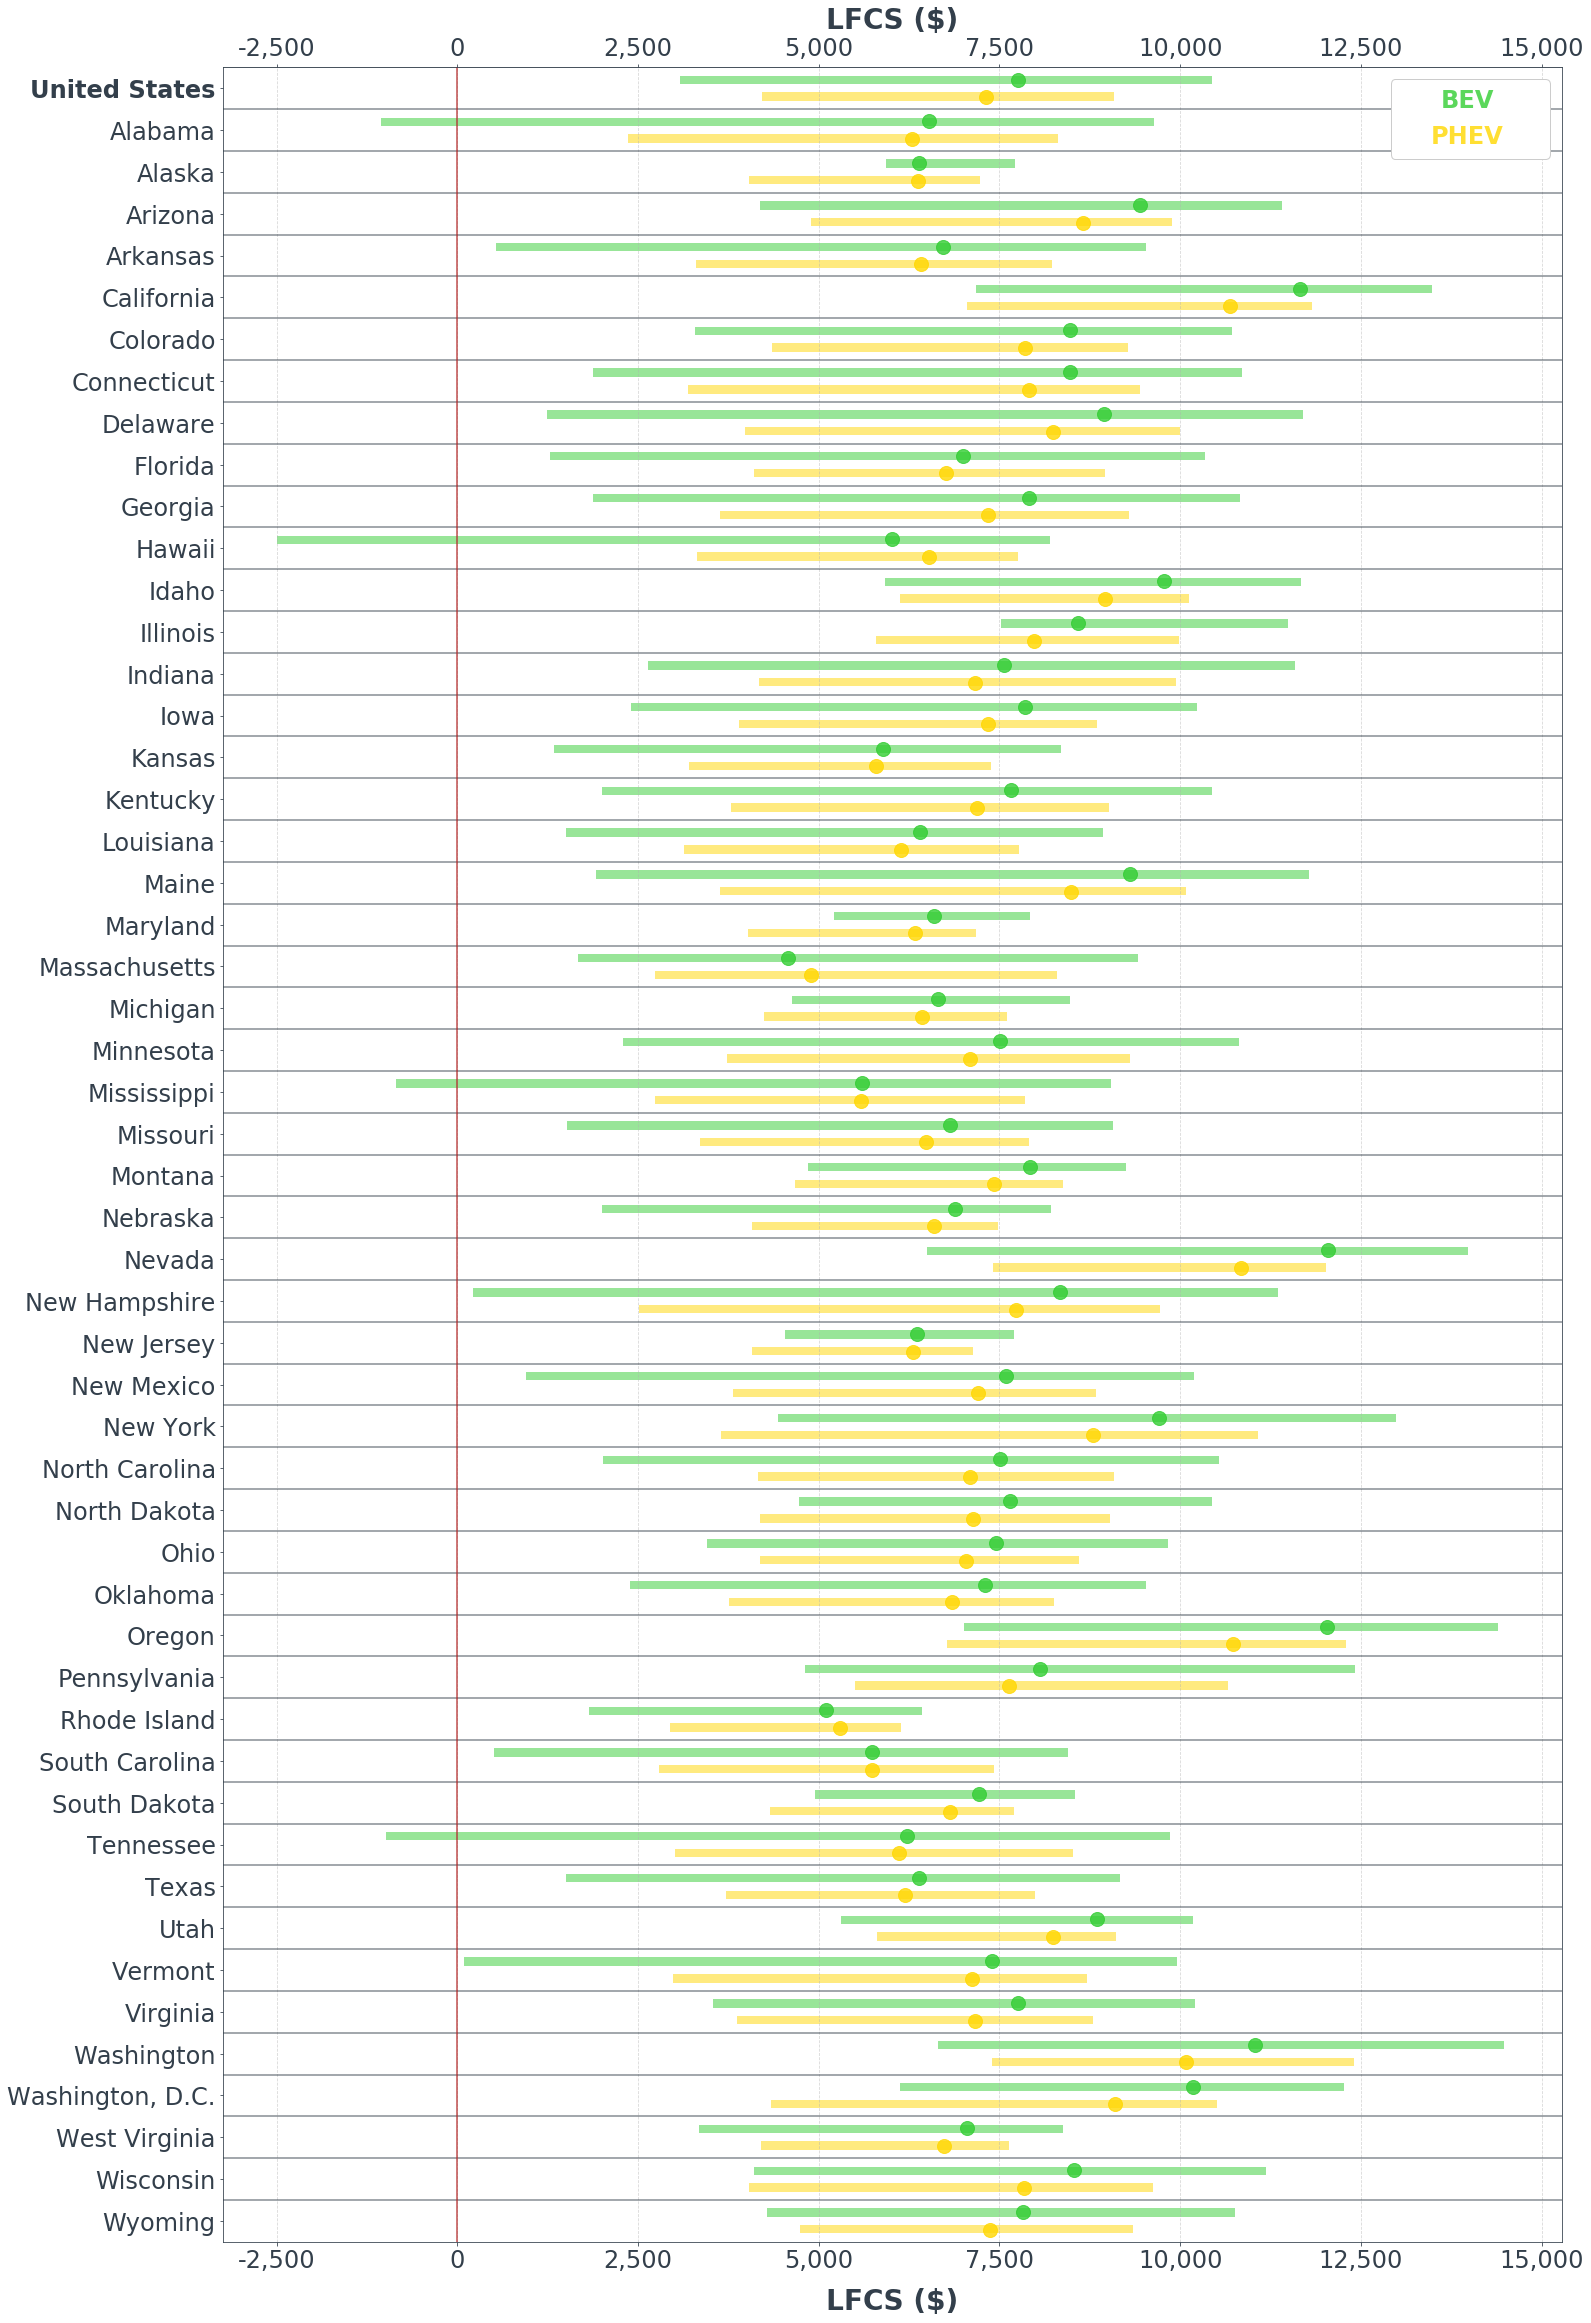

In [174]:
index = list(range(len(state_lfcs_df)))

fig, ax1 = plt.subplots(figsize=(24,40)) #plot_1 = (24,32)
y_vals = list(range(len(state_lfcs_df.iloc[index])))[::-1]
y_labels = state_lfcs_df['state'].iloc[index]
baseline_pts = state_lfcs_df['lfcs_bev_baseline'].iloc[index]
baseline_phev_pts = state_lfcs_df['lfcs_phev_baseline'].iloc[index]
x_bar_low = state_lfcs_df['lfcs_bev_upper'].iloc[index]
x_bar_phev_low = state_lfcs_df['lfcs_phev_upper'].iloc[index]
x_bar_high = state_lfcs_df['lfcs_bev_lower'].iloc[index]
x_bar_phev_high = state_lfcs_df['lfcs_phev_lower'].iloc[index]

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

for row in y_vals:
    plt.axhline(row+0.5, color='#333F4B', alpha=0.6)
bev_pt = plt.plot(baseline_pts, np.array(y_vals)+0.21, "o", markersize=14, color='limegreen', alpha=0.8, label='BEV')
phev_pt = plt.plot(baseline_phev_pts, np.array(y_vals)-0.21, "o", markersize=14, color='gold', alpha=0.8, label='PHEV')
bev_bar = plt.barh(np.array(y_vals)+0.20, x_bar_high-x_bar_low, height=0.2, left = x_bar_low, color='limegreen', alpha=0.5)
phev_bar = plt.barh(np.array(y_vals)-0.20, x_bar_phev_high-x_bar_phev_low, height=0.2, left = x_bar_phev_low, color='gold', alpha=0.5)
plt.axvline(0, color='firebrick', alpha=0.8)
plt.yticks(y_vals, y_labels, fontsize=24)
ax1.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.xticks(fontsize=24)
ax1.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_yticklabels()[0].set_weight('bold')
ax1.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
ax1.set_xlabel('LFCS ($)', labelpad=15, fontsize=28, fontweight='black', color = '#333F4B')
ax1.set_title('LFCS ($)', y=1.015, fontsize=28, fontweight='black', color = '#333F4B')
ax1.set_ylim(min(y_vals)-0.5, max(y_vals)+0.5)
ax1.set_xlim(min(np.append(state_lfcs_df['lfcs_bev_upper'],state_lfcs_df['lfcs_phev_upper']))-750, 
             max(np.append(state_lfcs_df['lfcs_bev_lower'], state_lfcs_df['lfcs_phev_lower']))+800)
plt.grid(axis='x', linestyle='--', alpha=0.5, zorder=-9)

empty = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
legend = plt.legend([empty, empty], ("BEV", "PHEV"), 
                    prop={'weight':'bold','size': 24}, 
                    framealpha=1,
                    loc = 'upper right')

#legend = plt.legend(fontsize=24, framealpha=1)

colors=('limegreen', 'gold')
for text, color in zip(legend.get_texts(), colors):
    plt.setp(text, color = color, alpha=0.8)
    text.set_ha('center')
    
plt.savefig('state_lfcs_range.png', dpi=300, bbox_inches='tight')
plt.show()

_____  
## Grouped LFCS

In [3]:
lfcs_filepath = '../outputs/lfcs-analysis/state_results.csv'
state_lfcs_df = pd.read_csv(lfcs_filepath)

In [4]:
bev_low_min = state_lfcs_df['lfcs_bev_lower'].min() #Rhode Island
bev_low_us = float(state_lfcs_df[state_lfcs_df.state=='US']['lfcs_bev_lower'])
bev_low_max = state_lfcs_df['lfcs_bev_lower'].max() #Washington

phev_low_min = state_lfcs_df['lfcs_phev_lower'].min() #Rhode Island
phev_low_us = float(state_lfcs_df[state_lfcs_df.state=='US']['lfcs_phev_lower'])
phev_low_max = state_lfcs_df['lfcs_phev_lower'].max() #Washington

bev_baseline_min = state_lfcs_df['lfcs_bev_baseline'].min() #Massachusetts
bev_baseline_us = float(state_lfcs_df[state_lfcs_df.state=='US']['lfcs_bev_baseline'])
bev_baseline_max = state_lfcs_df['lfcs_bev_baseline'].max() #Nevada

phev_baseline_min = state_lfcs_df['lfcs_phev_baseline'].min() #Massachusetts
phev_baseline_us = float(state_lfcs_df[state_lfcs_df.state=='US']['lfcs_phev_baseline'])
phev_baseline_max = state_lfcs_df['lfcs_phev_baseline'].max() #Nevada

bev_high_min = state_lfcs_df['lfcs_bev_upper'].min() #Hawaii
bev_high_us = float(state_lfcs_df[state_lfcs_df.state=='US']['lfcs_bev_upper'])
bev_high_max = state_lfcs_df['lfcs_bev_upper'].max() #Illinois

phev_high_min = state_lfcs_df['lfcs_phev_upper'].min() #Alabama
phev_high_us = float(state_lfcs_df[state_lfcs_df.state=='US']['lfcs_phev_upper'])
phev_high_max = state_lfcs_df['lfcs_phev_upper'].max() #Nevada

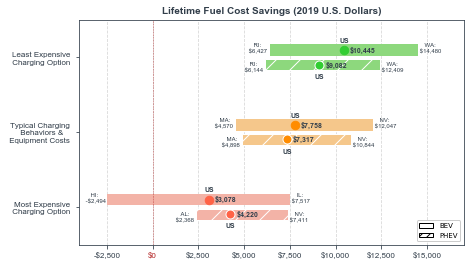

In [15]:
y_vals = list(range(3))[::-1]
y_labels = ['Least Expensive \n Charging Option ', 
            'Typical Charging \n Behaviors &    \n Equipment Costs ', 
            'Most Expensive \n Charging Option ']

fig, ax1 = plt.subplots(figsize=(6.88976,4.133856))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

def format_thousands_dollars_str(x,p=None):
    if x < 0:
        neg=True
    else:
        neg=False
        
    str_val = '$' + format(int(abs(x)), ',')
    if neg:
        str_val = '-'+str_val
    
    return str_val

us_pts = [bev_low_us, bev_baseline_us, bev_high_us]
us_phev_pts = [phev_low_us, phev_baseline_us, phev_high_us]
x_bar_low = np.array([bev_low_min, bev_baseline_min, bev_high_min])
x_bar_phev_low = np.array([phev_low_min, phev_baseline_min, phev_high_min])
x_bar_high = np.array([bev_low_max, bev_baseline_max, bev_high_max])
x_bar_phev_high = np.array([phev_low_max, phev_baseline_max, phev_high_max])

pt_colors = ['limegreen', 'darkorange', 'tomato']
bar_colors = ['#8DD87D', '#F5C78B', '#F3B3A7']
min_states_bev = ['RI', 'MA', 'HI']
max_states_bev = ['WA', 'NV', 'IL']
min_states_phev = ['RI', 'MA', 'AL']
max_states_phev = ['WA', 'NV', 'NV']

for y, bev_pt, phev_pt, bev_low, phev_low, bev_high, phev_high, pt_c, bar_c, min_st_b, max_st_b, min_st_p, max_st_p in zip(y_vals,
                                                                                                                           us_pts,
                                                                                                                           us_phev_pts,
                                                                                                                           x_bar_low,
                                                                                                                           x_bar_phev_low,
                                                                                                                           x_bar_high,
                                                                                                                           x_bar_phev_high,
                                                                                                                           pt_colors,
                                                                                                                           bar_colors,
                                                                                                                           min_states_bev,
                                                                                                                           max_states_bev,
                                                                                                                           min_states_phev,
                                                                                                                           max_states_phev):
    plt.plot(bev_pt, y+0.1, "o", markersize=8.5, color=pt_c)
    plt.text(bev_pt-220, y+0.2, 'US', color = '#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.text(bev_pt+320, y+0.07, f'${int(round(bev_pt,0)):,}', color='#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.plot(phev_pt, y-0.095, "o", mec='w', markersize=9, color=pt_c)
    plt.text(phev_pt-220, y-0.28, 'US', color = '#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.text(phev_pt+350, y-0.13, f'${int(round(phev_pt,0)):,}', color='#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.barh(y+0.10, bev_high-bev_low, height=0.15, left = bev_low, color=bar_c, zorder=2)
    plt.text(bev_low-1250, y+0.06, '    '+min_st_b+':\n {}'.format(format_thousands_dollars_str(bev_low)), color = '#333F4B', fontsize=6, fontname='Arial')
    plt.text(bev_high, y+0.06, '    '+max_st_b+':\n {}'.format(format_thousands_dollars_str(bev_high)), color = '#333F4B', fontsize=6, fontname='Arial')
    plt.barh(y-0.095, phev_high-phev_low, height=0.15, left = phev_low, edgecolor='w', color=bar_c, hatch='/', zorder=2)
    plt.text(phev_low-1200, y-0.2, '    '+min_st_p+':\n {}'.format(format_thousands_dollars_str(phev_low)), color = '#333F4B', fontsize=6, fontname='Arial')
    plt.text(phev_high, y-0.2, '    '+max_st_p+':\n {}'.format(format_thousands_dollars_str(phev_high)), color = '#333F4B', fontsize=6, fontname='Arial')

plt.xticks(fontsize=8, fontname='Arial')
plt.yticks(y_vals, y_labels, fontsize=8, fontname='Arial')

ax1.get_xaxis().set_major_formatter(FuncFormatter(format_thousands_dollars_str))

plt.title('Lifetime Fuel Cost Savings (2019 U.S. Dollars)', 
          fontsize=10, 
          fontweight='black', 
          color = '#333F4B', 
          fontname='Arial')

plt.axvline(0, color='firebrick', linestyle='--', linewidth=0.5, alpha=0.8, zorder=3)
ax1.get_xticklabels()[2].set_color('firebrick')

ax1.set_ylim(min(y_vals)-0.5, max(y_vals)+0.5)
ax1.set_xlim(-4000, 17000)
plt.grid(axis='x', linestyle='--', alpha=0.5)

bev_patch = mpatches.Patch(facecolor='w', edgecolor='k', label='BEV')
phev_patch = mpatches.Patch(facecolor='w', edgecolor = 'k', hatch=r'///', label='PHEV')
plt.legend(handles = [bev_patch, phev_patch], loc='lower right', framealpha=1, fontsize=7)

plt.savefig('grouped_lfcs.png', dpi=300, bbox_inches='tight')
plt.show()

___
## Grouped LCOC

In [18]:
# Set PATHs
baseline_bev_filepath = '../outputs/cost-of-charging/comb/comb_states_baseline.csv'
lower_bnd_bev_filepath = '../outputs/cost-of-charging/comb/comb_states_lower_bnd.csv'
upper_bnd_bev_filepath = '../outputs/cost-of-charging/comb/comb_states_upper_bnd.csv'

baseline_phev_filepath = '../outputs/cost-of-charging/comb/comb_states_phev_baseline.csv'
lower_bnd_phev_filepath = '../outputs/cost-of-charging/comb/comb_states_phev_lower_bnd.csv'
upper_bnd_phev_filepath = '../outputs/cost-of-charging/comb/comb_states_phev_upper_bnd.csv'

# Read files
baseline_data = pd.read_csv(baseline_bev_filepath)
baseline_phev_data = pd.read_csv(baseline_phev_filepath)
lower_bnd_df = pd.read_csv(lower_bnd_bev_filepath)
upper_bnd_df = pd.read_csv(upper_bnd_bev_filepath)
lower_bnd_phev_df = pd.read_csv(lower_bnd_phev_filepath)
upper_bnd_phev_df = pd.read_csv(upper_bnd_phev_filepath)

state_name_dict = {'US': 'United States',
                   'AK': 'Alaska',
                   'AL': 'Alabama', 
                   'AR': 'Arkansas',
                   'AZ': 'Arizona',
                   'CA': 'California',
                   'CO': 'Colorado',
                   'CT': 'Connecticut',
                   'DC': 'Washington, D.C.',
                   'DE': 'Delaware',
                   'FL': 'Florida',
                   'GA': 'Georgia',
                   'HI': 'Hawaii',
                   'IA': 'Iowa',
                   'ID': 'Idaho',
                   'IL': 'Illinois',
                   'IN': 'Indiana',
                   'KS': 'Kansas',
                   'KY': 'Kentucky',
                   'LA': 'Louisiana',
                   'MA': 'Massachusetts',
                   'MD': 'Maryland',
                   'ME': 'Maine',
                   'MI': 'Michigan',
                   'MN': 'Minnesota',
                   'MO': 'Missouri',
                   'MS': 'Mississippi',
                   'MT': 'Montana',
                   'NC': 'North Carolina',
                   'ND': 'North Dakota',
                   'NE': 'Nebraska',
                   'NH': 'New Hampshire',
                   'NJ': 'New Jersey',
                   'NM': 'New Mexico',
                   'NV': 'Nevada',
                   'NY': 'New York',
                   'OH': 'Ohio',
                   'OK': 'Oklahoma',
                   'OR': 'Oregon',
                   'PA': 'Pennsylvania',
                   'RI': 'Rhode Island',
                   'SC': 'South Carolina',
                   'SD': 'South Dakota',
                   'TN': 'Tennessee',
                   'TX': 'Texas',
                   'UT': 'Utah',
                   'VA': 'Virginia',
                   'VT': 'Vermont',
                   'WA': 'Washington',
                   'WI': 'Wisconsin',
                   'WV': 'West Virginia',
                   'WY': 'Wyoming'
                  }

baseline_data['state'] = baseline_data['state'].apply(lambda x: state_name_dict[x])
baseline_phev_data['state'] = baseline_phev_data['state'].apply(lambda x: state_name_dict[x])
# lower_bnd_df['state'] = lower_bnd_df['state'].apply(lambda x: state_name_dict[x])
# lower_bnd_phev_df['state'] = lower_bnd_phev_df['state'].apply(lambda x: state_name_dict[x])
upper_bnd_df['state'] = upper_bnd_df['state'].apply(lambda x: state_name_dict[x])
upper_bnd_phev_df['state'] = upper_bnd_phev_df['state'].apply(lambda x: state_name_dict[x])
#gas_prices_df['state'] = gas_prices_df['state'].apply(lambda x: state_name_dict[x])

baseline_data = baseline_data.sort_values(by='state')
baseline_phev_data = baseline_phev_data.sort_values(by='state')
lower_bnd_df = lower_bnd_df.sort_values(by='state')
lower_bnd_phev_df = lower_bnd_phev_df.sort_values(by='state')
upper_bnd_df = upper_bnd_df.sort_values(by='state')
upper_bnd_phev_df = upper_bnd_phev_df.sort_values(by='state')
#gas_prices_df = gas_prices_df.sort_values(by='state')

baseline_data = pd.concat([baseline_data[baseline_data.state=='United States'],
                          baseline_data[baseline_data.state!='United States']]).reset_index(drop=True)
baseline_phev_data = pd.concat([baseline_phev_data[baseline_phev_data.state=='United States'],
                                baseline_phev_data[baseline_phev_data.state!='United States']]).reset_index(drop=True)
lower_bnd_df = pd.concat([lower_bnd_df[lower_bnd_df.state=='United States'],
                          lower_bnd_df[lower_bnd_df.state!='United States']]).reset_index(drop=True)
lower_bnd_phev_df = pd.concat([lower_bnd_phev_df[lower_bnd_phev_df.state=='United States'],
                               lower_bnd_phev_df[lower_bnd_phev_df.state!='United States']]).reset_index(drop=True)
upper_bnd_df = pd.concat([upper_bnd_df[upper_bnd_df.state=='United States'],
                          upper_bnd_df[upper_bnd_df.state!='United States']]).reset_index(drop=True)
upper_bnd_phev_df = pd.concat([upper_bnd_phev_df[upper_bnd_phev_df.state=='United States'],
                          upper_bnd_phev_df[upper_bnd_phev_df.state!='United States']]).reset_index(drop=True)
# gas_prices_df = pd.concat([gas_prices_df[gas_prices_df.state=='United States'],
#                            gas_prices_df[gas_prices_df.state!='United States']])

In [21]:
bev_low_min = lower_bnd_df['lcoc_min'].min() #New York
bev_low_us = float(lower_bnd_df[lower_bnd_df.state=='US']['lcoc_min'])
bev_low_max = lower_bnd_df['lcoc_min'].max() #Hawaii

phev_low_min = lower_bnd_df['lcoc_min'].min() #New York
phev_low_us = float(lower_bnd_phev_df[lower_bnd_phev_df.state=='US']['lcoc_min'])
phev_low_max = lower_bnd_phev_df['lcoc_min'].max() #Hawaii

bev_baseline_min = baseline_data['lcoc_cost_per_kwh'].min() #DC
bev_baseline_us = float(baseline_data[baseline_data.state=='United States']['lcoc_cost_per_kwh'])
bev_baseline_max = baseline_data['lcoc_cost_per_kwh'].max() #Hawaii

phev_baseline_min = baseline_phev_data['lcoc_cost_per_kwh'].min() #OR
phev_baseline_us = float(baseline_phev_data[baseline_phev_data.state=='United States']['lcoc_cost_per_kwh'])
phev_baseline_max = baseline_phev_data['lcoc_cost_per_kwh'].max() #Hawaii

bev_high_min = upper_bnd_df['lcoc_max'].min() #Virginia
bev_high_us = float(upper_bnd_df[upper_bnd_df.state=='United States']['lcoc_max'])
bev_high_max = upper_bnd_df['lcoc_max'].max() #Hawaii

phev_high_min = upper_bnd_df['lcoc_max'].min() #Nevada
phev_high_us = float(upper_bnd_phev_df[upper_bnd_phev_df.state=='United States']['lcoc_max'])
phev_high_max = upper_bnd_phev_df['lcoc_max'].max() #Hawaii

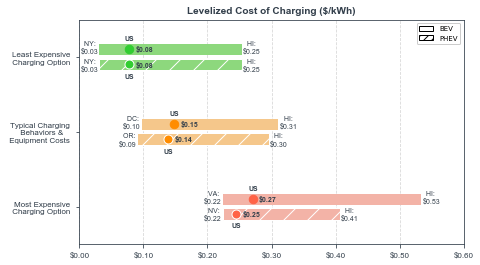

In [26]:
y_vals = list(range(3))[::-1]
y_labels = ['Least Expensive \n Charging Option ', 
            'Typical Charging \n Behaviors &    \n Equipment Costs ', 
            'Most Expensive \n Charging Option ']

fig, ax1 = plt.subplots(figsize=(6.88976,4.133856))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

us_pts = [bev_low_us, bev_baseline_us, bev_high_us]
us_phev_pts = [phev_low_us, phev_baseline_us, phev_high_us]
x_bar_low = np.array([bev_low_min, bev_baseline_min, bev_high_min])
x_bar_phev_low = np.array([phev_low_min, phev_baseline_min, phev_high_min])
x_bar_high = np.array([bev_low_max, bev_baseline_max, bev_high_max])
x_bar_phev_high = np.array([phev_low_max, phev_baseline_max, phev_high_max])

pt_colors = ['limegreen', 'darkorange', 'tomato']
bar_colors = ['#8DD87D', '#F5C78B', '#F3B3A7']
min_states_bev = ['NY', 'DC', 'VA']
max_states_bev = ['HI', 'HI', 'HI']
min_states_phev = ['NY', 'OR', 'NV']
max_states_phev = ['HI', 'HI', 'HI']

for y, bev_pt, phev_pt, bev_low, phev_low, bev_high, phev_high, pt_c, bar_c, min_st_b, max_st_b, min_st_p, max_st_p in zip(y_vals,
                                                                                                                           us_pts,
                                                                                                                           us_phev_pts,
                                                                                                                           x_bar_low,
                                                                                                                           x_bar_phev_low,
                                                                                                                           x_bar_high,
                                                                                                                           x_bar_phev_high,
                                                                                                                           pt_colors,
                                                                                                                           bar_colors,
                                                                                                                           min_states_bev,
                                                                                                                           max_states_bev,
                                                                                                                           min_states_phev,
                                                                                                                           max_states_phev):
    plt.plot(bev_pt, y+0.105, "o", markersize=8.5, color=pt_c)
    plt.text(bev_pt-0.007, y+0.22, 'US', color = '#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.text(bev_pt+0.01, y+0.075, f'${round(bev_pt,2):,}', color='#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.plot(phev_pt, y-0.095, "o", mec='w', markersize=9, color=pt_c)
    plt.text(phev_pt-0.007, y-0.28, 'US', color = '#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.text(phev_pt+0.01, y-0.132, f'${round(phev_pt,2):,}', color='#333F4B', fontweight='bold', fontsize=7, fontname='Arial')
    plt.barh(y+0.10, bev_high-bev_low, height=0.15, left = bev_low, color=bar_c, zorder=2)
    plt.text(bev_low-0.029, y+0.05, '  '+min_st_b+':\n'+"${:.2f}".format(bev_low), color='#333F4B', fontsize=7, fontname='Arial')
    plt.text(bev_high+0.002, y+0.05, '  '+max_st_b+':\n'+"${:.2f}".format(bev_high), color='#333F4B', fontsize=7, fontname='Arial')
    plt.barh(y-0.095, phev_high-phev_low, height=0.15, left = phev_low, edgecolor='w', color=bar_c, hatch='/', zorder=2)
    plt.text(phev_low-0.029, y-0.18, '  '+min_st_p+':\n'+"${:.2f}".format(phev_low), color='#333F4B', fontsize=7, fontname='Arial')
    plt.text(phev_high+0.002, y-0.18, '  '+max_st_p+':\n'+"${:.2f}".format(phev_high), color='#333F4B', fontsize=7, fontname='Arial')
  
plt.xticks(fontsize=8, fontname='Arial')
plt.yticks(y_vals, y_labels, fontsize=8, fontname='Arial')
ax1.get_xaxis().set_major_formatter(FormatStrFormatter('$%.2f'))

plt.title('Levelized Cost of Charging ($/kWh)', 
          fontsize=10, 
          fontweight='black', 
          color = '#333F4B', 
          fontname='Arial')

ax1.set_ylim(min(y_vals)-0.5, max(y_vals)+0.5)
ax1.set_xlim(0, 0.6)
plt.grid(axis='x', linestyle='--', alpha=0.5)

bev_patch = mpatches.Patch(facecolor='w', edgecolor='k', label='BEV')
phev_patch = mpatches.Patch(facecolor='w', edgecolor = 'k', hatch=r'///', label='PHEV')
plt.legend(handles = [bev_patch, phev_patch], loc='upper right', framealpha=1, fontsize=7)

plt.savefig('grouped_lcoc.png', dpi=300, bbox_inches='tight')
plt.show()

_____  
## DCFC Station Profiles


In [79]:
dcfc_prof_path = '../data/dcfc-load-profiles/'
p1_df = pd.read_csv(dcfc_prof_path+'dcfc_current_1plug-low_50kW.csv', parse_dates=True)
p2_df = pd.read_csv(dcfc_prof_path+'dcfc_current_1plug-high_50kW.csv', parse_dates=True)
p3_df = pd.read_csv(dcfc_prof_path+'dcfc_interm_4plugs_150kW.csv', parse_dates=True)
p4_df = pd.read_csv(dcfc_prof_path+'dcfc_future_20plugs_400kW.csv', parse_dates=True)

In [80]:
p1_df['dt'] = pd.to_datetime(p1_df['Time'])
p1_power_df = p1_df[(p1_df['dt'] > '2015-03-01 00:00:00') & (p1_df['dt'] < '2015-03-08 00:00:00')]

p2_df['dt'] = pd.to_datetime(p2_df['Time'])
p2_power_df = p2_df[(p2_df['dt'] > '2015-03-01 00:00:00') & (p2_df['dt'] < '2015-03-08 00:00:00')]

p3_df['dt'] = pd.to_datetime(p3_df['Time'])
p3_power_df = p3_df[(p3_df['dt'] > '2017-03-05 00:00:00') & (p3_df['dt'] < '2017-03-12 00:00:00')]

p4_df['dt'] = pd.to_datetime(p4_df['Time'])
p4_power_df = p4_df[(p4_df['dt'] > '2017-03-05 00:00:00') & (p4_df['dt'] < '2017-03-12 00:00:00')]

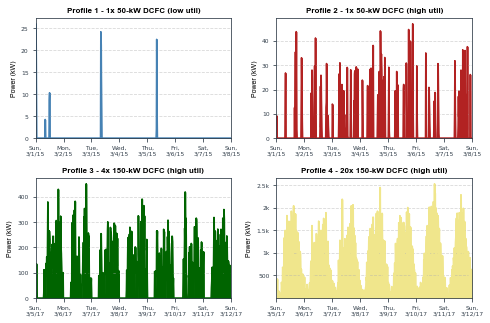

In [83]:
fmt = DateFormatter("%a,\n%-m/%-d/%y")

x_vals = [
    p1_power_df['dt'],
    p2_power_df['dt'],
    p3_power_df['dt'],
    p4_power_df['dt'] 
]

y_vals = [
    p1_power_df['Power, kW'],
    p2_power_df['Power, kW'],
    p3_power_df['Power, kW'],
    p4_power_df['Power, kW'] 
]

titles = [
    'Profile 1 - 1x 50-kW DCFC (low util)',
    'Profile 2 - 1x 50-kW DCFC (high util)',
    'Profile 3 - 4x 150-kW DCFC (high util)',
    'Profile 4 - 20x 150-kW DCFC (high util)'
]

rows = [0,0,1,1]
cols = [0,1,0,1]

date_ranges = [[datetime.date(2015, 3, 1), datetime.date(2015, 3, 8)],
               [datetime.date(2015, 3, 1), datetime.date(2015, 3, 8)],
               [datetime.date(2017, 3, 5), datetime.date(2017, 3, 12)],
               [datetime.date(2017, 3, 5), datetime.date(2017, 3, 12)]]

colors = ['steelblue',
          'firebrick',
          'darkgreen',
          'khaki']

fig, ax = plt.subplots(2, 2, figsize=(6.88976,4.593173))
for x, y, title, i, j, date_range, color in zip(x_vals, y_vals, titles, rows, cols, date_ranges, colors):
    fig.tight_layout()
    ax[i, j].plot(x, y, c=color)
    ax[i, j].fill_between(x, y, color=color)
    ax[i, j].xaxis.set_major_formatter(fmt)
    ax[i, j].grid(axis='y', linestyle='--', alpha=0.5)
    ax[i, j].set_ylim(0)
    ax[i, j].set_xlim(date_range)
    ax[i, j].set_ylabel('Power (kW)', fontsize=7, fontname='Arial')
    ax[i, j].set_title(title, fontsize=8, fontweight='bold', fontname='Arial')
    ax[i, j].tick_params(axis='x', labelsize=6)
    ax[i, j].tick_params(axis='y', labelsize=6)
plt.yticks([500, 1000, 1500, 2000, 2500], ['500', '1k', '1.5k', '2k', '2.5k'])
plt.savefig('dcfc_profiles.pbg', dpi=300, bbox_inches='tight')
plt.show()

___
## Fuel Price Escalation (Scenarios)

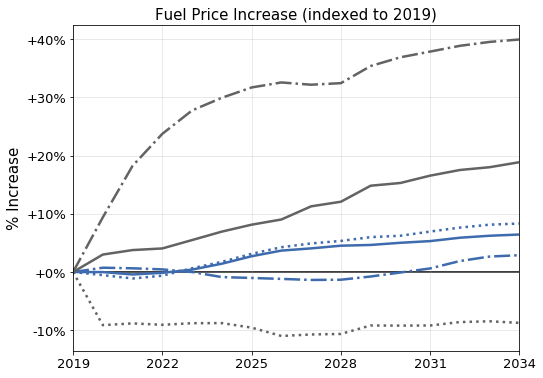

In [330]:
import numpy as np
years = np.arange(2019,2035)
# prices indexed to 2019 as %
aeo19_elec_ref = [0.00, -0.01, -0.42, -0.14, 0.42, 1.43, 2.71, 3.68, 4.06, 4.52, 4.65, 5.02, 5.31, 5.89, 6.23, 6.44] #residential electricity - AEO19 Ref. case
aeo19_elec_ho = [0.00, 0.74, 0.64, 0.45, 0.00, -0.87, -1.02, -1.18, -1.36, -1.32, -0.77, -0.08, 0.62, 1.89, 2.66, 2.89] #residential electricity - AEO19 High Oil case
aeo19_elec_lo = [0.00, -0.53, -1.11, -0.63, 0.65, 1.75, 3.13, 4.26, 4.91, 5.34, 5.99, 6.23, 6.95, 7.63, 8.13, 8.33] #residential electricity - AEO19 Low Oil case
aeo19_gas_ref = [0.00, 3.00, 3.77, 4.05, 5.49, 6.94, 8.13, 9.02, 11.28, 12.07, 14.82, 15.29, 16.55, 17.52, 18.00, 18.86] #motor gasoline - AEO19 Ref. case
aeo19_gas_ho = [0.00, 9.40, 18.24, 23.73, 27.75, 29.92, 31.69, 32.55, 32.16, 32.43, 35.37, 36.87, 37.85, 38.84, 39.51, 39.93] #motor gasoline - AEO19 High Oil case
aeo19_gas_lo = [0.00, -9.12, -8.82, -9.06, -8.79, -8.77, -9.55, -10.98, -10.72, -10.63, -9.18, -9.20, -9.18, -8.59, -8.46, -8.73] #motor gasoline - AEO19 Low Oil case

elec_color = '#3e6bad'
gas_color = '#636362'

plt.figure(figsize=(8,6))
plt.plot(years, aeo19_elec_ref, c=elec_color, linewidth=2.5, zorder=2)
plt.plot(years, aeo19_elec_ho, c=elec_color, linewidth=2.5, linestyle='dashdot', zorder=2)
plt.plot(years, aeo19_elec_lo, c=elec_color, linewidth=2.5, linestyle='dotted', zorder=2)
plt.plot(years, aeo19_gas_ref, c=gas_color, linewidth=2.5, zorder=2)
plt.plot(years, aeo19_gas_ho, c=gas_color, linewidth=2.5, linestyle='dashdot', zorder=2)
plt.plot(years, aeo19_gas_lo, c=gas_color, linewidth=2.5, linestyle='dotted', zorder=2)
plt.xticks(years[::3], years[::3], fontsize=13)
plt.yticks(np.arange(-10,50,10), [f"+{y}%" if y >= 0 else f"{y}%" for y in np.arange(-10,50,10)],fontsize=13)
plt.ylabel('% Increase', fontsize=15)
plt.title('Fuel Price Increase (indexed to 2019)', fontsize=15)
plt.axhline(0, c='k', linewidth=1.5, zorder=-1)
plt.grid(axis='both', alpha=0.35)
plt.xlim(years[0], years[-1])
plt.savefig('../img/aeo19_fuel_price_escalations.png', dpi=300, bbox_inches='tight')
plt.show()